In [5]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import sys
sys.path.append("../")
import os

from distribution import Pareto, Exp, Normal

from general_prior import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

import matplotlib
matplotlib.style.use('classic')
import pickle as pkl


from finite import curves_one_stage, curves_two_stage
from finite import greedy, dp, beta, get_data
from tqdm import tqdm_notebook

In [6]:
param = {
    'sigmag': [1, 1],
    'pg': [0.4, 0.6],
}

In [47]:
n=100000
T=10
pot = st.pareto(b=3)

a1s = np.arange(0.01, 1.01, 0.01)
for fact in [1, 2, 3, 4]:
    res = {'gr': [], 'dp': [], 'beta': []}
    param['sigmag'][0] = param['sigmag'][1] * fact
    for t in tqdm_notebook(range(T)):
        data = get_data(n, param, potential=pot)
        res['gr'].append(curves_one_stage(data,  a1s, T=T, alg=greedy))
        res['dp'].append(curves_one_stage(data,  a1s, T=T, alg=dp))

    res['gr'] = np.array(res['gr'])
    res['dp'] = np.array(res['dp'])
    res['beta'] = np.array(res['beta'])
    with open("./data/pareto/pareto-{}-{}-{}.pkl".format(1, n, fact), 'wb') as f:
        pkl.dump(res, f)

In [54]:
n=100000
T=10
a1s = np.arange(0.01, 1.01, 0.01)

pot = st.pareto(b=3)
for fact in [1, 2, 3, 4]:
    res = {'gr': [], 'dp': [], 'beta': []}
    param['sigmag'][0] = param['sigmag'][1] * fact
    for t in tqdm_notebook(range(T)):
        data = get_data(n, param, potential=pot)
        res['gr'].append(curves_two_stage(data, a1s, T=T, alg=greedy))
        res['dp'].append(curves_two_stage(data, a1s, T=T, alg=dp))

    res['gr'] = np.array(res['gr'])
    res['dp'] = np.array(res['dp'])
    res['beta'] = np.array(res['beta'])
    with open("./data/pareto/pareto-{}-{}-{}.pkl".format(2, n, fact), 'wb') as f:
        pkl.dump(res, f)

# Figures

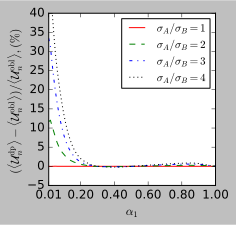

In [10]:
plt.figure(figsize=(3,3))
lw=1
n=100000
color = ['r', 'g', 'b', 'k']
ls = ['-', '--', '-.', ':']
for i, fact in enumerate([1,2,3,4]):
    with open("./data/pareto/pareto-{}-{}-{}.pkl".format(1, n, fact), 'rb') as f:
        res = pkl.load(f)
    plt.plot(np.array(res['dp'][0,0,:]), (np.array(res['dp'][:,1,:]).mean(axis=0)/np.array(res['gr'][:,1,:]).mean(axis=0) - 1) * 100, \
             ls=ls[i], color=color[i], lw=lw, label="$\\sigma_A / \\sigma_B={}$".format(fact))

# plt.yticks(fontsize=9)
plt.xlabel("$\\alpha_1$")
plt.ylabel("$(\\langle\mathcal{U}_n^\mathrm{dp} \\rangle - \\langle\mathcal{U}_n^\mathrm{obl}\\rangle) / \\langle\mathcal{U}_n^\mathrm{obl}\\rangle,(\%)$\t", rotation=90)

plt.legend(fontsize=11, loc='upper right')
plt.xlim(0.01,1)
plt.ylim(-5,40)
plt.xticks([0.01, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.savefig("../fig/pareto-u1.pdf", bbox_inches='tight')

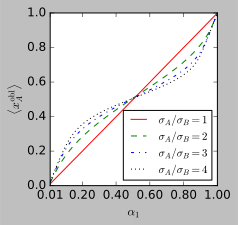

In [11]:
plt.figure(figsize=(3,3))
lw=1
color = ['r', 'g', 'b', 'k']
ls = ['-', '--', '-.', ':']
for i, fact in enumerate([1,2,3,4]):
    with open("./data/pareto/pareto-{}-{}-{}.pkl".format(1, n, fact), 'rb') as f:
        res = pkl.load(f)
    plt.plot(np.array(res['dp'][0,0,:]), (np.array(res['gr'][:,2,:])).mean(axis=0), \
             ls=ls[i], color=color[i], lw=lw, label="$\\sigma_A / \\sigma_B={}$".format(fact))

# plt.yticks(fontsize=9)
plt.xlabel("$\\alpha_1$")
plt.ylabel("$\\langle x_A^\mathrm{obl} \\rangle$", rotation=90)

plt.legend(fontsize=11, loc='lower right')
plt.xlim(0.05,1)
# plt.ylim(-2,40)
plt.xticks([0.01, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.savefig("../fig/pareto-x.pdf", bbox_inches='tight')

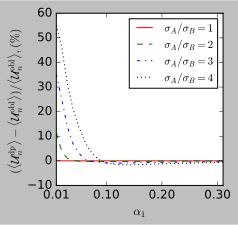

In [12]:
plt.figure(figsize=(3,3))
lw=1
n=100000
color = ['r', 'g', 'b', 'k']
ls = ['-', '--', '-.', ':']
for i, fact in enumerate([1,2,3,4]):
    with open("./data/pareto/pareto-{}-{}-{}.pkl".format(2, n, fact), 'rb') as f:
        res = pkl.load(f)
    plt.plot(np.array(res['dp'][0,0,:]), \
             (np.array(res['dp'][:,1,:]).mean(axis=0)/np.array(res['gr'][:,1,:]).mean(axis=0) - 1) * 100, \
             ls=ls[i], color=color[i], lw=lw, label="$\\sigma_A / \\sigma_B={}$".format(fact))
plt.xticks([0.01, 0.1, 0.2, 0.3])

# plt.yticks()
plt.xlabel("$\\alpha_1$")
plt.ylabel("$(\\langle\mathcal{U}_n^\mathrm{dp} \\rangle - \\langle\mathcal{U}_n^\mathrm{obl}\\rangle) / \\langle\mathcal{U}_n^\mathrm{obl}\\rangle,(\%)$\t", rotation=90)
plt.xlim(0.01, 0.31)
plt.legend(fontsize=11, loc='upper right')

plt.savefig("../fig/pareto-u2.pdf", bbox_inches='tight')